In [1]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 2.2 MB/s eta 0:00:0000:0100:01


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import category_encoders as ce
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import pickle

In [4]:
# Specify the path to your CSV file
csv_file_path = 'car_evaluation.csv'

In [5]:
# Import necessary libraries
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)


In [38]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.coloum = col_names
col_names

/home/u213917/tmp/ipykernel_511287/3019676739.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coloum = col_names


['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# Now you can work with the DataFrame as needed
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


In [8]:
df.shape

(1727, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df.isnull().sum()
#We can see that there are no missing values in the dataset

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
df.isnull().sum()
#We can see that there are no missing values in the dataset

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
df['class'].value_counts()
#The class target variable is ordinal in nature.

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
X = df.drop(['class'], axis=1)
y = df['class']

In [15]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [16]:
# checking the shape of train and test
X_train.shape,X_test.shape

((1157, 6), (570, 6))

In [17]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [19]:
# encoding process in categorical columns
import category_encoders as ce

In [20]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [21]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [22]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [23]:
# Create a Decision Tree Classifier with the "entropy" criterion
clf = DecisionTreeClassifier(criterion="entropy")

In [24]:
# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [26]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9719


[Text(0.3638698630136986, 0.9615384615384616, 'x[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.3501712328767123, 0.8846153846153846, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.3775684931506849, 0.8846153846153846, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3638698630136986, 0.8076923076923077, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.3912671232876712, 0.8076923076923077, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.136986301369863, 0.7307692307692307, 'x[1] <= 1.5\nentropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.1232876712328767, 0.6538461538461539, 'entropy = 0.0\nsamples = 66\nvalue = [0, 0, 66, 0]'),
 Text(0.1506849315068493, 0.6538461538461539, 'x[1] <= 2.5\nentropy = 0.958\nsamples = 200\nvalue = [124, 0, 76, 0]'),
 Text(0.0684931506849315, 0.5769230769230769, 'x[0] <= 1.5\nentropy = 0.918\nsamples = 6

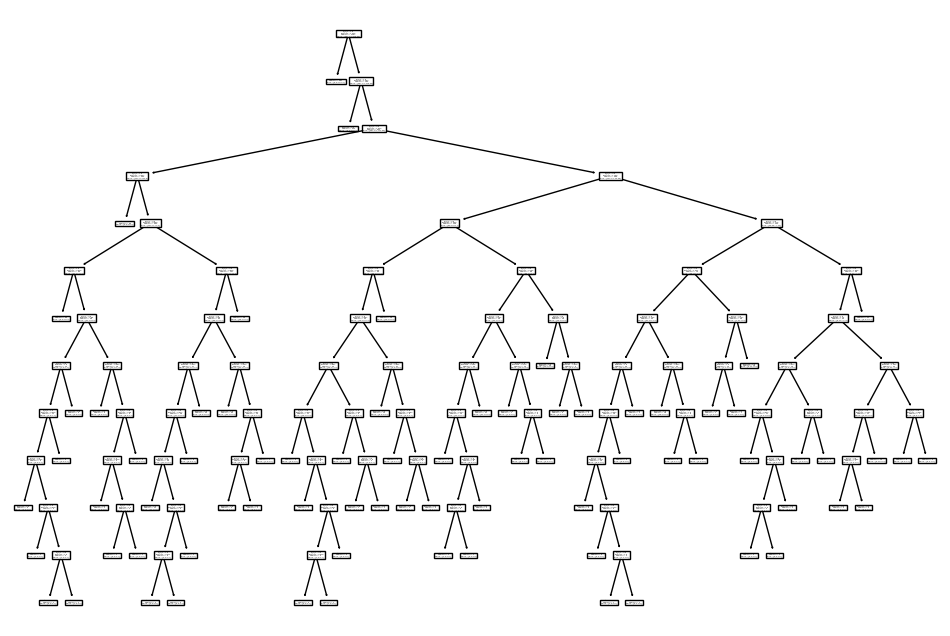

In [27]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))

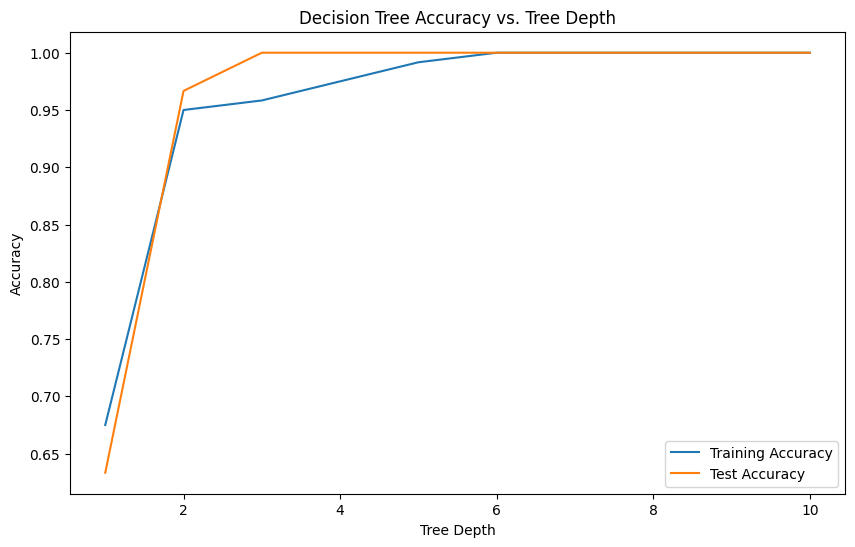

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the csv file 
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy values
train_accuracy = []
test_accuracy = []

# Test different tree depths
depths = np.arange(1, 11)
for depth in depths:
    # Create a Decision Tree Classifier with the specified depth
    clf = DecisionTreeClassifier(criterion="gini", max_depth=depth)

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate and store accuracy values
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracy, label="Training Accuracy")
plt.plot(depths, test_accuracy, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Tree Depth")
plt.legend()
plt.show()


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

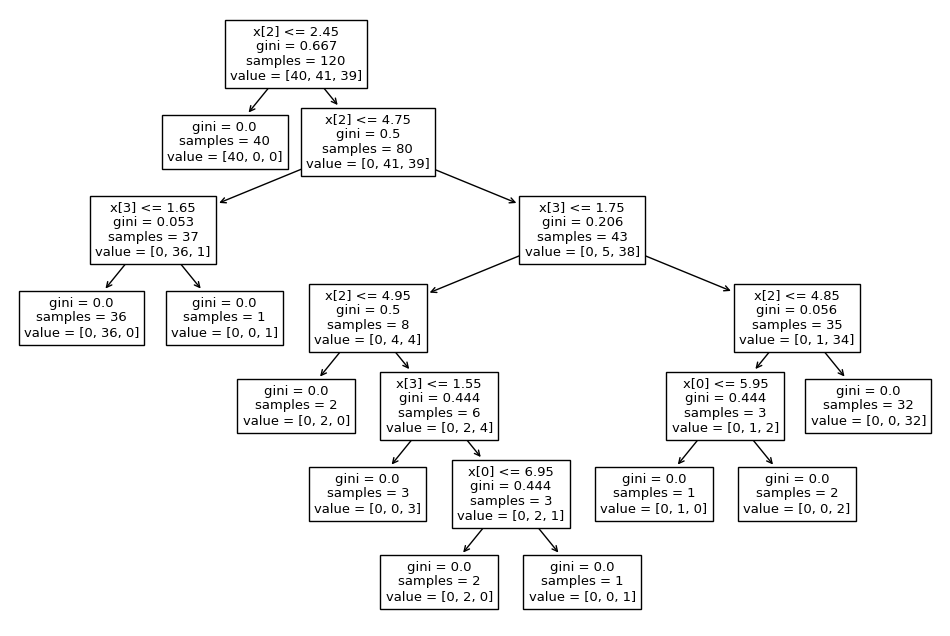

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train))

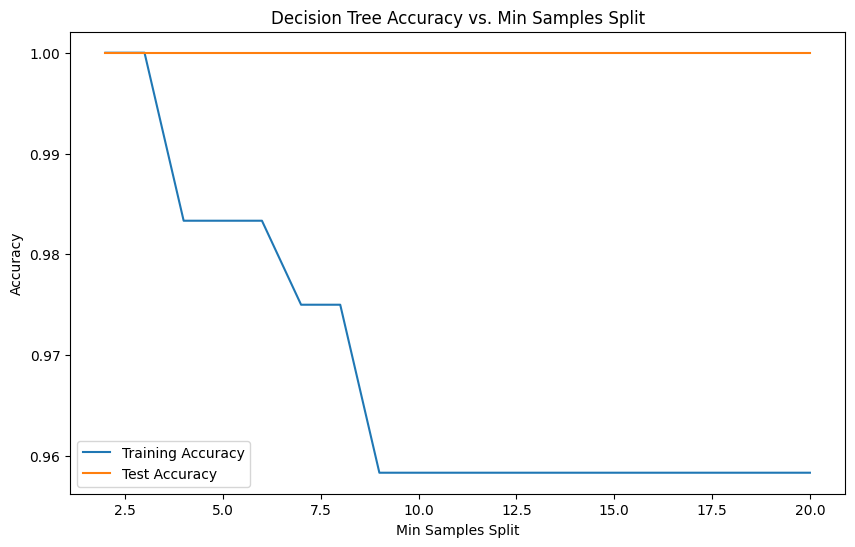

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy values
train_accuracy = []
test_accuracy = []

# Test different values for min_samples_split
min_samples_splits = np.arange(2, 21)
for min_samples_split in min_samples_splits:
    # Create a Decision Tree Classifier with the specified min_samples_split
    clf = DecisionTreeClassifier(criterion="gini", min_samples_split=min_samples_split)

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate and store accuracy values
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracy, label="Training Accuracy")
plt.plot(min_samples_splits, test_accuracy, label="Test Accuracy")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Min Samples Split")
plt.legend()
plt.show()


In [31]:
dtc_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split= 2, random_state=0, min_samples_leaf= 1)

# fit the model
dtc_gini.fit(X_train, y_train)
y_pred_gini = dtc_gini.predict(X_test)

In [32]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(dtc_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dtc_gini.score(X_test, y_test)))

Training set score: 0.9583
Test set score: 1.0000
